## Tokenize, Tag Tweet messages

Code notebook that reads tweet-reply containing csv into a dataframe, then isolates tweet and reply messages as .txt files to be fed into CMU Tweet Tagger to be part-of-speech tagged for further analysis. 

As part of this process, @-mentions are dropped because they are a naturally and consistently occurring feature of reply messages and twitter conversations, and thus not necessary in this analysis of alignment. This also preserves the identity of Twitter users and assures their privacy. 

In [1]:
import nltk
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 

# Import the tweet tagger from working directory
import CMUTweetTaggerWindows as tagger

#Import TwettNLP_Tokenizer from working directory
import TweetNLP_Tokenizer as tokenize

In [1]:
# Translate csv to Dataframe 
# Data in form of ID~a_id~a_username~a_unixtime~a_tweet~b_id~b_username~b_unixtime~b_tweet

tweetData = pd.read_csv('pairs_edit_utf_noSquig.csv', sep='~',)
#tweetData

In [2]:
# Test functions with set of sample tweets

sampleTweets = sampleTweets.drop(['a_id','ID','a_username','b_id','b_username','b_unixtime','a_unixtime'],axis=1)
#sampleTweets.head()

## Tokenize tweets using tweetnlp tokenizer - twokenizer wrapper

In [10]:
a_tweets = []
for i in tweetData['a_tweet']:
    h = tokenize.simpleTokenize(i)
    a_tweets.append(h)
    

In [11]:
len(a_tweets)

326168

In [13]:
# Drop the last item in the tweetData list, because there is no b_tweet reply message to 
# correspond to a_tweet 

droppedData = tweetData.drop(326167)

In [14]:
b_tweets = []
for i in droppedData['b_tweet']:
    h = tokenize.simpleTokenize(i)
    b_tweets.append(h)

In [15]:
len(b_tweets)

326167

In [84]:
# Write lists of tokenized tweets to file
a_tweets_file = open('a_tweets_tokenized.txt','w')

for item in a_tweets:
    a_tweets_file.write('%s\n' % item)

In [85]:
b_tweets_file = open('b_tweets_tokenized.txt','w')

for item in b_tweets:
    b_tweets_file.write('%s\n' % item)

### Drop @-mentions from tweet message text


In [3]:
a_tweets[0:5]

In [4]:
b_tweets[0:5]

In [5]:
mention_dict = []

#Initialize whichever list corresponds to a_tweets or b_tweets

#noAts_A = []
noAts_B = []

def removeAtsTokenizedTweets(tweets):
    for tweet in tweets:
        tweet_words = []
        for word in tweet:
            if(word[0:1]=='@' and len(word)>1):
                mention_dict.append(word)
            else:
                tweet_words.append(word)
        #noAts_A.append(tweet_words)     # Uncomment if A_tweets are being worked on
        noAts_B.append(tweet_words)
        

In [19]:
removeAtsTokenizedTweets(a_tweets)

In [20]:
len(noAts_A)

326168

In [22]:
removeAtsTokenizedTweets(b_tweets)

In [23]:
len(noAts_B)

326167

In [6]:
#noAts_A[0]

### Count token length in each list

In [7]:
#a_tweets = pd.read_csv('a_tweets_tok_noAt.txt')#, sep='',)
#text_file = open('NoAtsATweets.csv','r')
#a_tweets = text_file.readlines()
#text_file.close()
#a_tweets[0:5]

In [25]:
tokenLengthA = []
tokenLengthB = []

In [29]:
# loop to count token lengths

def countTokens(tweets):
    for tweet in tweets: 
        l = len(tweet)
        tokenLengthB.append(l)
        #tokenLengthA.append(l) #Uncomment when running to get token length for A users

In [30]:
countTokens(b_tweets)

In [28]:
tokenLengthA[0:5]     # List of Token Counts for a_tweets

[26, 26, 16, 20, 29]

In [31]:
max(tokenLengthB)

52

### Save counts to txt file

In [37]:
file = open('tokenLengthATweets.csv','w')
for item in tokenLengthA:
    file.write("%i\n" %item)
file.close()

In [39]:
file = open('tokenLengthBTweets.csv','w')
for item in tokenLengthB:
    file.write("%i\n" %item)
file.close()

In [223]:
import heapq, random
max_values = heapq.nlargest(3, tokenLengthB)

In [224]:
max_indecesB = []
for value in max_values:
    max_indecesB.append(tokenLengthB.index(value))
    
max_indecesB

[141321, 251948, 226365]

In [204]:
# Find tweet with max length to check 
#import operator
#index,value = max(enumerate(tokenLengthA), key = operator.itemgetter)
max_value_A = max(tokenLengthA)
max_index_A = tokenLengthA.index(max_value_A)
max_index_A

251954

In [138]:
print(meanATokens, meanBTokens)

14.794237307882158 14.6244826254116


In [266]:
meanATokens = np.mean(tokenLengthA)
meanATokens

16.039127075617472

In [268]:
meanBTokens = np.mean(tokenLengthB)
meanBTokens

15.869352203012568

No handles with labels found to put in legend.


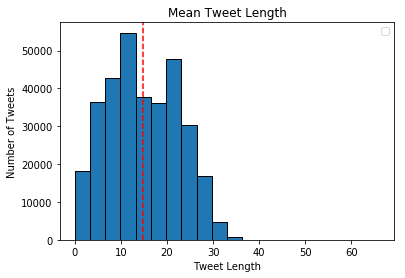

In [142]:
# Plot mean tokens
plt.hist(tokenLengthA,bins=20,edgecolor='k')
plt.axvline(meanATokens, color='r', linestyle = 'dashed')
plt.title('Mean Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.legend()
plt.savefig('MeanTokenLengthATweets')

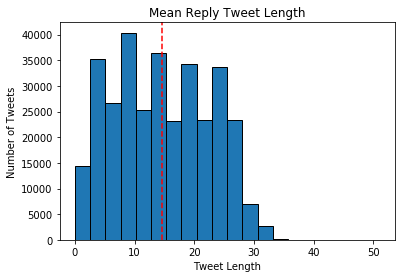

In [143]:
# Plot mean tokens b-tweets
plt.hist(tokenLengthB,bins=20,edgecolor='k')
plt.axvline(meanBTokens, color='r', linestyle = 'dashed')
plt.title('Mean Reply Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')

#plt.legend()
plt.savefig('MeanTokenLengthBTweets')

In [264]:
np.std(tokenLengthB)

7.927732625140321

In [265]:
np.std(tokenLengthA)

7.624746940101147

In [262]:
np.var(tokenLengthB)

62.84894457571424

In [263]:
np.var(tokenLengthA)

58.13676590058181

In [276]:
# Write lists of tokenized, @-free tweets to file
a_file = open('a_tweets_tok_noAt.csv','w')

for item in noAts_A:
    a_file.write('%s\n' % item)

In [288]:
# Write lists of tokenized, @-free tweets to file
b_file = open('b_tweets_tok_noAt.txt','w')

for item in noAts_B:
    b_file.write('%s\n' % item)

b_file.close()

In [290]:
# Clean off brackets in text files for a and b on seprate occasions, replacing letter as needed
text = ''
with open ('b_tweets_tok_noAt.txt','r') as myfile:
    text = myfile.read()
    text = text.replace('[', '')
    text = text.replace(']', '')

# To save back as a cleaned up file:
with open ('NoAtsBTweets.txt', 'w') as myfile2: 
    myfile2.write(text)
    
myfile.close()
myfile2.close()

In [299]:
# Program to join string
def join_string (list_string):
    string = ' '.join(list_string)
    return string

In [8]:
# Join the individual word lists into string. Replace 'B' with 'A' to clean a_tweets

#cleanedTweets_B = []
#for item in noAts_B:
#    v = join_string(item)
#    cleanedTweets_B.append(v)
#cleanedTweets_B

In [ ]:
# Write lists of tokenized, @-free tweets to file
b_file = open('cleanedBtoTag.txt','w')

for item in cleanedTweets_B:
    b_file.write('%s\n' % item)

b_file.close()

In [316]:
# Run tagger on the cleaned a and b tweets; save each

tagger.runFile('cleanedAtoTag.txt')
tagger.runFile('cleanedBtoTag.txt')